In [1]:
import caveclient as cc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_venn import venn2
from tqdm.auto import tqdm

/var/folders/pz/l5ltdh6x63j99hyc0cy_3pvm0000gn/T/ipykernel_52870/3980852132.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.auto import tqdm


In [2]:
client = cc.CAVEclient("minnie65_phase3_v1")

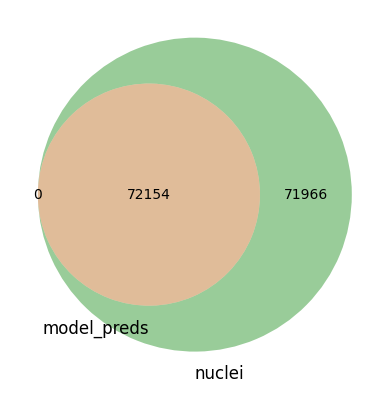

In [3]:
model_preds = client.materialize.query_table("aibs_metamodel_mtypes_v661_v2")

# TODO this one seems to match the paper better but is just for excitatory neurons
# model_preds = client.materialize.query_table("aibs_soma_nuc_exc_mtype_preds_v117")

nuclei = client.materialize.query_table("nucleus_detection_v0")

# TODO differences between querying on root_id, supervoxel_id, or target_id/id?
model_preds_root_ids = set(model_preds["target_id"].unique())
nuclei_root_ids = set(nuclei["id"].unique())

venn2([model_preds_root_ids, nuclei_root_ids], set_labels=["model_preds", "nuclei"])

model_preds.set_index("target_id", inplace=True)
nuclei.set_index("id", inplace=True)

In [4]:
model_df = model_preds.join(
    nuclei, how="inner", lsuffix="_model_preds", rsuffix="_nuclei"
)
duplicated = model_df.index.duplicated(keep=False)
model_df[duplicated]
# TODO looks like there are some (I think harmless) duplicated entries

,id,created_model_preds,valid_model_preds,classification_system,cell_type,id_ref,created_ref,valid_ref,volume_model_preds,pt_supervoxel_id_model_preds,...,bb_end_position_model_preds,created_nuclei,superceded_id,valid_nuclei,volume_nuclei,pt_supervoxel_id_nuclei,pt_root_id_nuclei,pt_position_nuclei,bb_start_position_nuclei,bb_end_position_nuclei
target_id,,,,,,,,,,,,,,,,,,,,,
276440,21186,2023-08-22 18:11:58.721505+00:00,t,inhibitory_neuron,PTC,276440,2020-09-28 22:41:30.391142+00:00,t,446.436147,89606006917044156,...,"[nan, nan, nan]",2020-09-28 22:41:30.391142+00:00,NaN,t,446.436147,89606006917044156,864691136117381284,"[180288, 258960, 23956]","[nan, nan, nan]","[nan, nan, nan]"
276440,21187,2023-08-22 18:11:58.722221+00:00,t,inhibitory_neuron,PTC,276440,2020-09-28 22:41:30.391142+00:00,t,446.436147,89606006917044156,...,"[nan, nan, nan]",2020-09-28 22:41:30.391142+00:00,NaN,t,446.436147,89606006917044156,864691136117381284,"[180288, 258960, 23956]","[nan, nan, nan]","[nan, nan, nan]"
307222,25102,2023-08-22 18:12:14.136667+00:00,t,excitatory_neuron,L6tall-a,307222,2020-09-28 22:45:05.528997+00:00,t,316.841165,90940058118754743,...,"[nan, nan, nan]",2020-09-28 22:45:05.528997+00:00,NaN,t,316.841165,90940058118754743,864691135476662696,"[190432, 237008, 23821]","[nan, nan, nan]","[nan, nan, nan]"
307222,25103,2023-08-22 18:12:14.137705+00:00,t,excitatory_neuron,L6tall-a,307222,2020-09-28 22:45:05.528997+00:00,t,316.841165,90940058118754743,...,"[nan, nan, nan]",2020-09-28 22:45:05.528997+00:00,NaN,t,316.841165,90940058118754743,864691135476662696,"[190432, 237008, 23821]","[nan, nan, nan]","[nan, nan, nan]"
309467,25520,2023-08-22 18:12:14.512830+00:00,t,inhibitory_neuron,DTC,309467,2020-09-28 22:45:19.856465+00:00,t,379.711488,90168132303920501,...,"[nan, nan, nan]",2020-09-28 22:45:19.856465+00:00,NaN,t,379.711488,90168132303920501,864691136990457749,"[184736, 253008, 24565]","[nan, nan, nan]","[nan, nan, nan]"
309467,25521,2023-08-22 18:12:14.513550+00:00,t,inhibitory_neuron,DTC,309467,2020-09-28 22:45:19.856465+00:00,t,379.711488,90168132303920501,...,"[nan, nan, nan]",2020-09-28 22:45:19.856465+00:00,NaN,t,379.711488,90168132303920501,864691136990457749,"[184736, 253008, 24565]","[nan, nan, nan]","[nan, nan, nan]"
311979,25679,2023-08-22 18:12:14.675071+00:00,t,excitatory_neuron,L5NP,311979,2020-09-28 22:45:17.861004+00:00,t,364.315771,90310794071693960,...,"[nan, nan, nan]",2020-09-28 22:45:17.861004+00:00,NaN,t,364.315771,90310794071693960,864691135952250403,"[185824, 267072, 25428]","[nan, nan, nan]","[nan, nan, nan]"
311979,25680,2023-08-22 18:12:14.676034+00:00,t,excitatory_neuron,L5NP,311979,2020-09-28 22:45:17.861004+00:00,t,364.315771,90310794071693960,...,"[nan, nan, nan]",2020-09-28 22:45:17.861004+00:00,NaN,t,364.315771,90310794071693960,864691135952250403,"[185824, 267072, 25428]","[nan, nan, nan]","[nan, nan, nan]"


In [5]:
model_df = model_df[~model_df.index.duplicated(keep="first")]

In [6]:
model_df["cell_type"].value_counts()

cell_type
L4b          7490
L6tall-a     6081
L6tall-c     5906
L3b          5886
L4a          5213
L2c          4242
L3a          4018
L2b          3683
L6short-a    3381
L2a          3226
PTC          3058
DTC          2919
L4c          2888
L5b          2725
L6short-b    2456
L5a          2235
L5ET         1944
L6tall-b     1876
ITC          1403
L5NP          943
STC           581
Name: count, dtype: int64

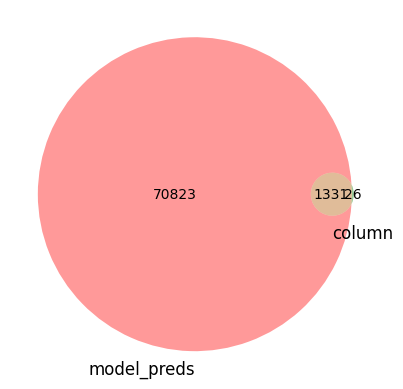

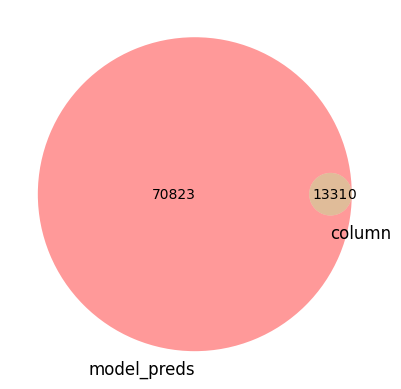

In [7]:
# TODO unsure how a few of the categories map onto his colors in the paper
# BC - basket cell
# MC - Martinotti cell
# NGC - neurogliaform cell
# BPC - bipolar cell (where are multipolar cells?)

# I think this annotates all of the neurons in the slanted tube
column_df = client.materialize.query_table("allen_v1_column_types_slanted_ref")

column_df["cell_type"].value_counts()

fig, ax = plt.subplots()

venn2(
    [set(model_df.index), set(column_df["target_id"])],
    set_labels=["model_preds", "column"],
    ax=ax,
)

column_df = column_df.query("target_id.isin(@model_df.index)")

column_df.set_index("target_id", inplace=True)

fig, ax = plt.subplots()

venn2(
    [set(model_df.index), set(column_df.index)],
    set_labels=["model_preds", "column"],
    ax=ax,
)
plt.show()

In [8]:
# remap positions (which come as a list) to their own xyz columns

column_model_df = model_df.loc[column_df.index]

positions = column_model_df["pt_position_nuclei"].explode().reset_index()


def to_xyz(order):
    if order % 3 == 0:
        return "x"
    elif order % 3 == 1:
        return "y"
    else:
        return "z"


positions["axis"] = positions.index.map(to_xyz)
positions = positions.pivot(
    index="target_id", columns="axis", values="pt_position_nuclei"
)

column_model_df = column_model_df.join(positions)

column_model_df[["x", "y", "z"]]

,x,y,z
target_id,,,
258319,178400,143248,21238
276438,179648,258768,23597
260552,177408,157968,21002
260263,169440,158128,20266
262898,172512,175280,21964
...,...,...,...
267029,173008,205856,20391
267294,175376,203728,22239
303145,185632,206224,22266


/var/folders/pz/l5ltdh6x63j99hyc0cy_3pvm0000gn/T/ipykernel_52870/2813878355.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


[Text(0, 0, 'L2a'),
 Text(1, 0, 'L2b'),
 Text(2, 0, 'L2c'),
 Text(3, 0, 'L3a'),
 Text(4, 0, 'L3b'),
 Text(5, 0, 'L4a'),
 Text(6, 0, 'L4b'),
 Text(7, 0, 'L4c'),
 Text(8, 0, 'L5ET'),
 Text(9, 0, 'L5NP'),
 Text(10, 0, 'L5a'),
 Text(11, 0, 'L5b'),
 Text(12, 0, 'L6short-a'),
 Text(13, 0, 'L6short-b'),
 Text(14, 0, 'L6tall-a'),
 Text(15, 0, 'L6tall-b'),
 Text(16, 0, 'L6tall-c')]

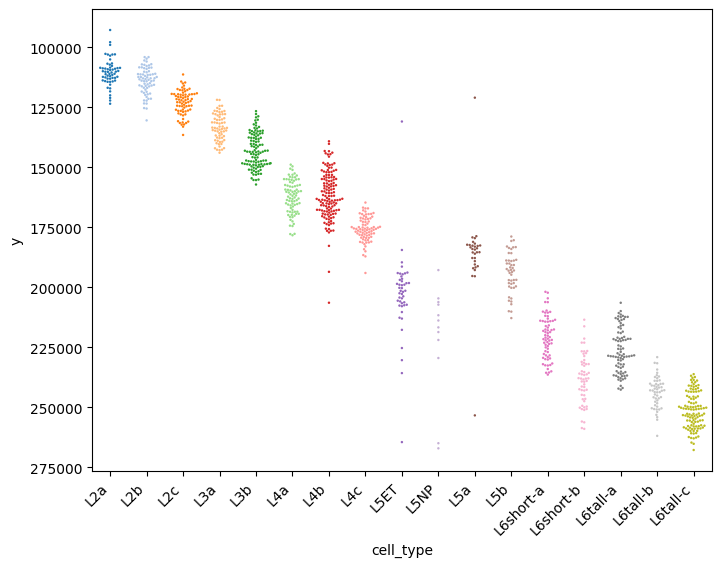

In [9]:
excitatory_df = column_model_df.query("classification_system == 'excitatory_neuron'")

excitatory_df = excitatory_df.sort_values("cell_type")

# FIGURE 3E
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.swarmplot(
    data=excitatory_df, x="cell_type", y="y", hue="cell_type", palette="tab20", s=1.75
)
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# TODO seems like the labels here don't match up with the labels in the paper

# TODO what is the transformation between xyz and soma depth?

In [10]:
source_ids = column_model_df.query("cell_type == 'PTC'")["pt_root_id_model_preds"]
target_ids = column_model_df.query("cell_type == 'L2a'")["pt_root_id_model_preds"]

# TODO this doesn't eat a pandas index object even though it says iterable
query_synapses = client.materialize.synapse_query(
    pre_ids=list(source_ids), post_ids=list(target_ids)
)
mean_synapses_per_target_cell = len(query_synapses) / len(target_ids)
mean_synapses_per_target_cell

48.785714285714285

In [11]:
exc_df = column_model_df.query("classification_system == 'excitatory_neuron'")
inh_df = column_model_df.query("classification_system == 'inhibitory_neuron'")

pbar = tqdm(total=exc_df["cell_type"].nunique() * inh_df["cell_type"].nunique())

rows = []
for source_name, source_df in inh_df.groupby("cell_type"):
    for target_name, target_df in exc_df.groupby("cell_type"):
        source_ids = source_df["pt_root_id_model_preds"]
        target_ids = target_df["pt_root_id_model_preds"]

        query_synapses = client.materialize.synapse_query(
            pre_ids=source_ids, post_ids=target_ids
        )
        mean_synapses_per_target_cell = len(query_synapses) / len(target_ids)
        rows.append(
            {
                "source": source_name,
                "target": target_name,
                "mean_syn_per_target": mean_synapses_per_target_cell,
            }
        )
        pbar.update(1)

pbar.close()

connection_df = pd.DataFrame(rows)

  0%|          | 0/68 [00:00<?, ?it/s]

In [12]:
connection_df = connection_df.pivot(
    index="source", columns="target", values="mean_syn_per_target"
)
connection_df = connection_df.loc[["PTC", "DTC", "STC", "ITC"]]

<Axes: xlabel='source', ylabel='target'>

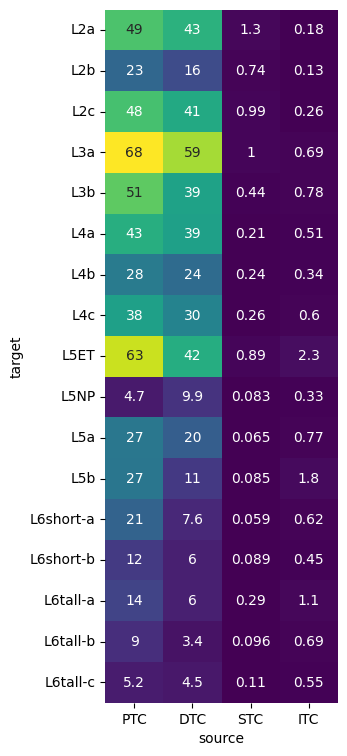

In [13]:
# FIGURE 4C
fig, ax = plt.subplots(1, 1, figsize=(3, 9))
sns.heatmap(connection_df.T, annot=True, cmap="viridis", ax=ax, cbar=False)